In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("data_banknote_authentication.csv")
df

,V1,V2,V3,V4,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
df.max()

V1        6.8248
V2       12.9516
V3       17.9274
V4        2.4495
Class     1.0000
dtype: float64

In [5]:
df.min()

V1       -7.0421
V2      -13.7731
V3       -5.2861
V4       -8.5482
Class     0.0000
dtype: float64

In [6]:
df.describe()

,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'Class'], dtype='object')

In [23]:
df.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

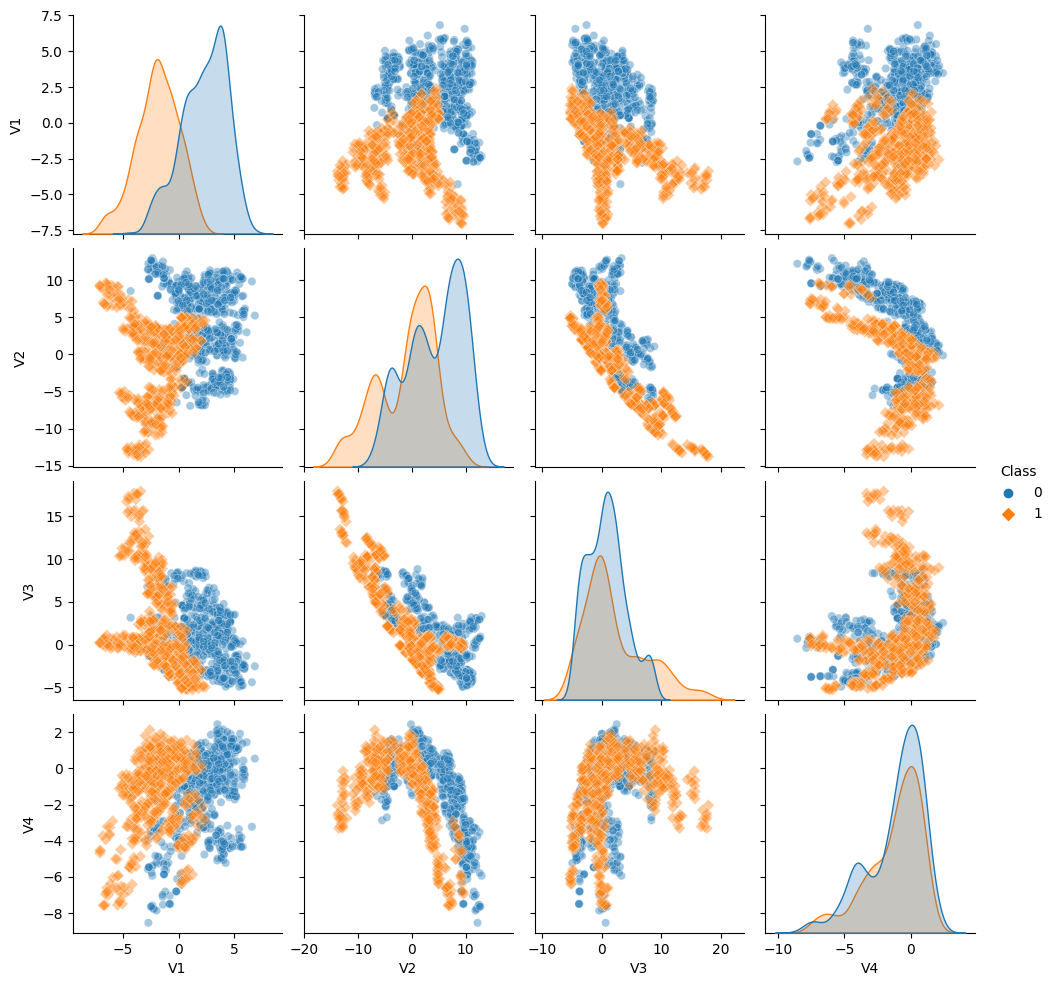

In [8]:
sns.pairplot(df, vars=['V1', 'V2', 'V3','V4'],
            hue='Class',
            markers=['o', 'D', '+'],
            plot_kws={'alpha': .4})

In [9]:
from sklearn.cluster import KMeans

In [10]:
Traindata = np.column_stack((df.V1, df.V2, df.V3, df.V4))
Traindata

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

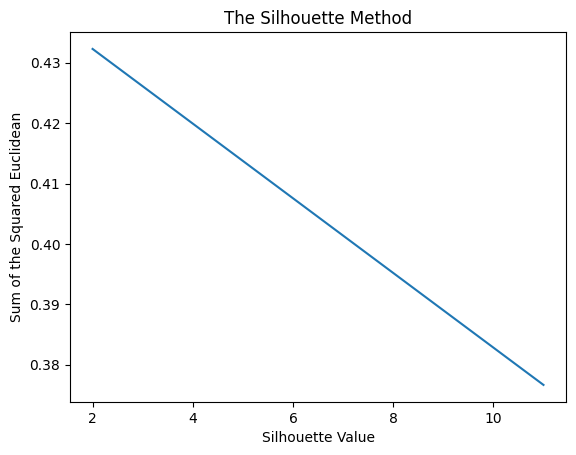

In [11]:
from sklearn.metrics import silhouette_score

sil = []
krange = (2, 11)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in krange:
  kmeans = KMeans(n_clusters = k).fit(Traindata)
  labels = kmeans.labels_
  sil.append(silhouette_score(Traindata, labels, metric = 'euclidean'))

plt.title('The Silhouette Method')
plt.plot(krange,sil)
plt.xlabel('Silhouette Value')
plt.ylabel('Sum of the Squared Euclidean')
plt.show()

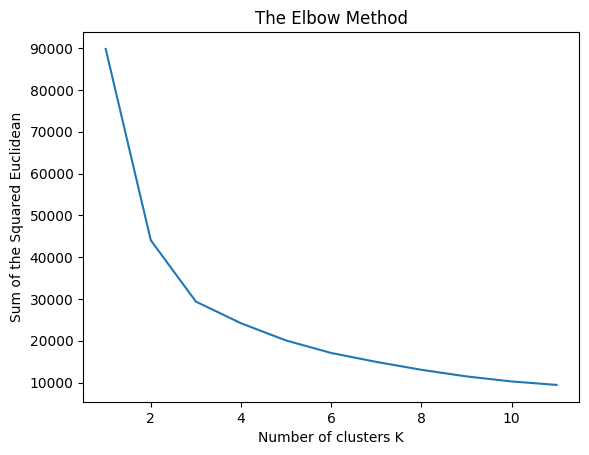

In [12]:
from sklearn.cluster import KMeans
k_meansclus = range(1,12)
sse = []

for k in k_meansclus:
  km = KMeans(n_clusters =k)
  km.fit(Traindata)
  sse.append(km.inertia_)

plt.title('The Elbow Method')
plt.plot(k_meansclus,sse)
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of the Squared Euclidean')
plt.show()

In [13]:
model = KMeans(n_clusters=2)
model

KMeans(n_clusters=2)

In [14]:
model.fit(Traindata)

KMeans(n_clusters=2)

In [15]:
model.cluster_centers_

array([[-0.4080158 , -4.58371927,  6.00001153, -0.05917612],
       [ 0.86248195,  5.23622718, -0.94660169, -1.76848647]])

In [16]:
model.labels_

array([1, 1, 0, ..., 0, 0, 0])

In [17]:
df['Class'].values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [18]:
pd.crosstab(df['Class'], model.labels_)

col_0,0,1
Class,,
0,192,570
1,270,340


In [19]:
df.sample(5)

,V1,V2,V3,V4,Class
5,4.36840,9.671800,-3.9606,-3.16250,0
1341,-2.26250,-0.099335,2.8127,0.48662,1
324,3.52570,1.282900,1.9276,1.79910,0
280,0.20977,-0.461460,7.7267,0.90946,0
729,-0.95923,0.091039,6.2204,-1.48280,0


In [20]:
from sklearn.metrics import silhouette_score
silhouette_score(Traindata, model.labels_)

0.4322884268206766

In [21]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(Traindata, model.labels_)

0.8701515036349552

In [22]:
correct = 0

for i in range(0,1372):
    if df.Class[i] == model.labels_[i]:
        correct+=1
print(correct/1371)

0.38803792851932895
